In [2]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

#to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical 
import np_utils 
from keras.callbacks import ModelCheckpoint



In [7]:
#Paths for Data
Ravdess='C:\\Users\\Roma\\Desktop\\SET\\Sem_2\\RAVDESS\\audio_speech_actors_01-24\\'
Crema='C:\\Users\\Roma\\Desktop\\SET\\Sem_2\\CREMA-D\\AudioWAV\\'
Tess='C:\\Users\\Roma\\Desktop\\SET\\Sem_2\\TESS\\'
Savee='C:\\Users\\Roma\\Desktop\\SET\\Sem_2\\SAVEE\\ALL\\'

# RAVDESS Dataset

In [8]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
print(Ravdess_df.Emotions.value_counts())

Emotions
calm        192
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
neutral      96
Name: count, dtype: int64


C:\Users\Roma\AppData\Local\Temp\ipykernel_7268\1545297856.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


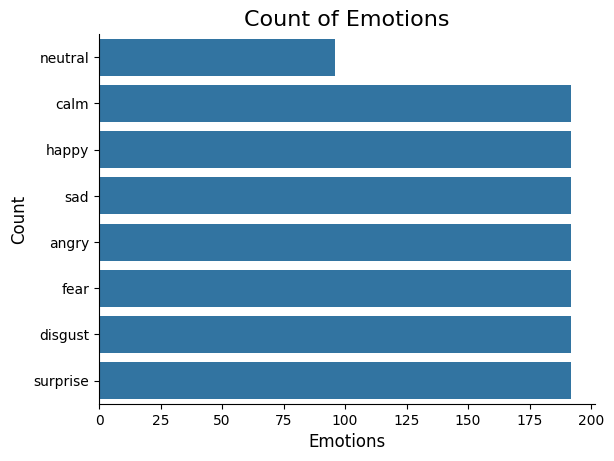

In [5]:
plt.title('Count of Emotions', size=16)
sns.countplot(Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# CREMA-D Dataset

In [9]:
crema_directory_list=os.listdir(Crema)

In [10]:
file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


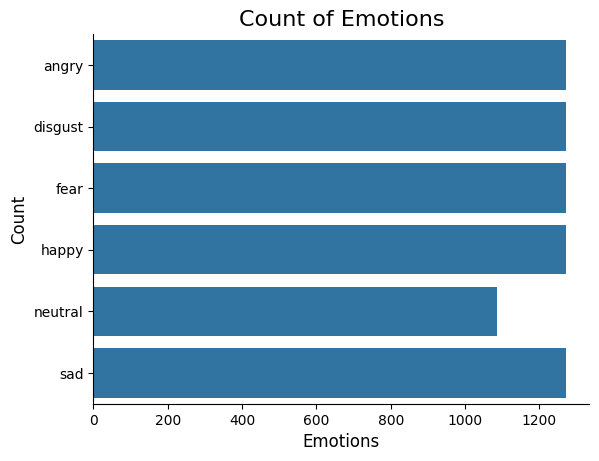

In [11]:
plt.title('Count of Emotions', size=16)
sns.countplot(Crema_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# TESS Dataset

In [12]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
print(Tess_df.Emotions.value_counts())

Emotions
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64


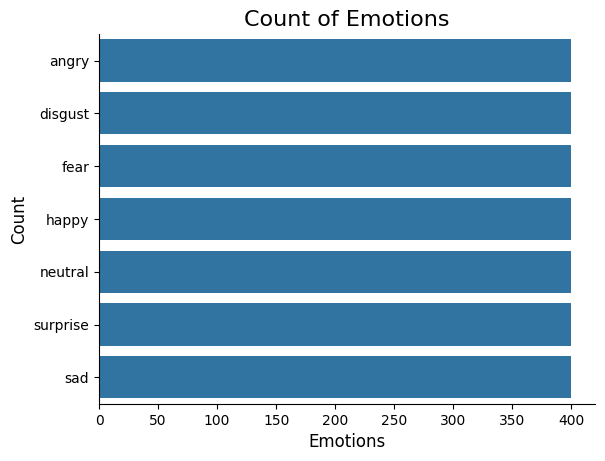

In [13]:
plt.title('Count of Emotions', size=16)
sns.countplot(Tess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# SAVEE Dataset

In [14]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
print(Savee_df.Emotions.value_counts())


Emotions
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64


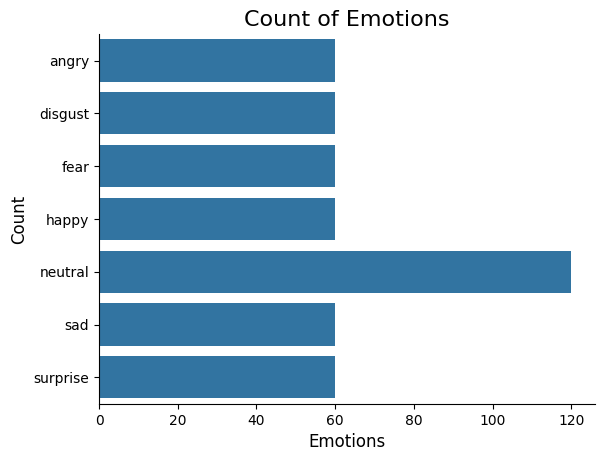

In [15]:
plt.title('Count of Emotions', size=16)
sns.countplot(Savee_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# Combining all the four dataframes into a single dataframe

In [16]:
final_data = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
final_data.to_csv("data_path.csv",index=False)

In [17]:
print(final_data.Emotions.value_counts())

Emotions
happy       1923
sad         1923
angry       1923
fear        1923
disgust     1923
neutral     1703
surprise     652
calm         192
Name: count, dtype: int64


In [80]:
print(len(final_data))

11522


# Data Visualization

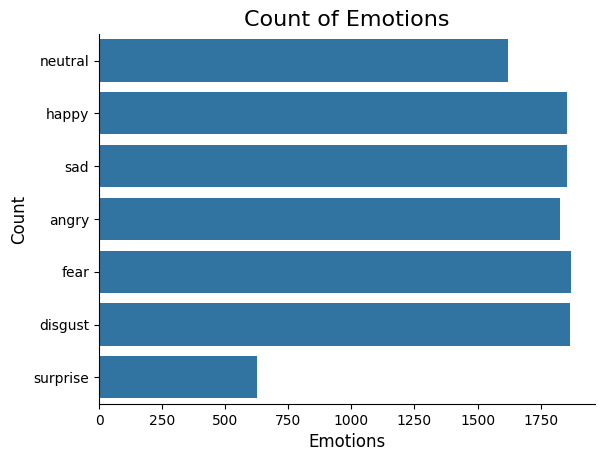

In [81]:
plt.title('Count of Emotions', size=16)
sns.countplot(final_data.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [20]:
final_data=final_data.drop(final_data[final_data['Emotions']=='calm'].index)

In [21]:
final_data.Emotions.value_counts()

Emotions
fear        1872
disgust     1867
sad         1856
happy       1855
angry       1825
neutral     1619
surprise     628
Name: count, dtype: int64

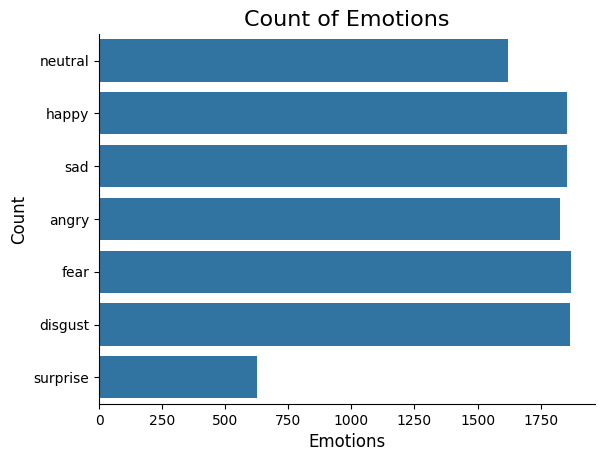

In [22]:
plt.title('Count of Emotions', size=16)
sns.countplot(final_data.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [23]:
def create_waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title('Waveplot for audio with {} emotion'.format(emotion),size=10)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

In [24]:
def create_spectrogram(data,sr,emotion):
    X=librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10,4))
    plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=10)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

### Fear

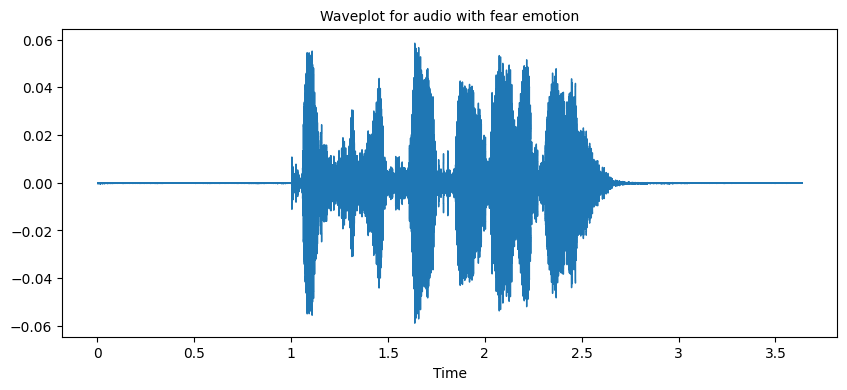

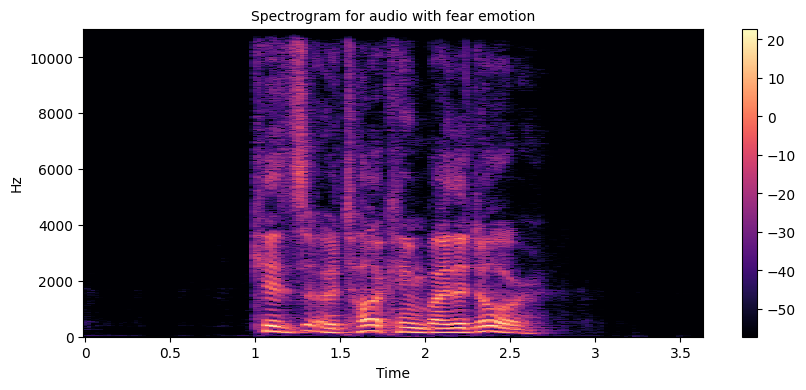

In [25]:
emotion='fear'
path = np.array(final_data.Path[final_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Anger

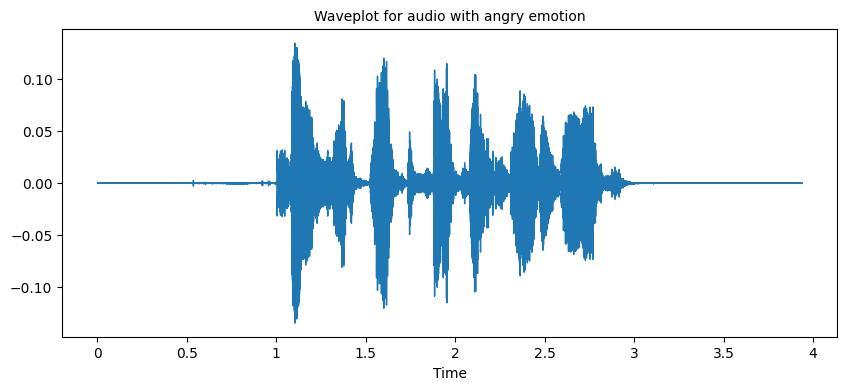

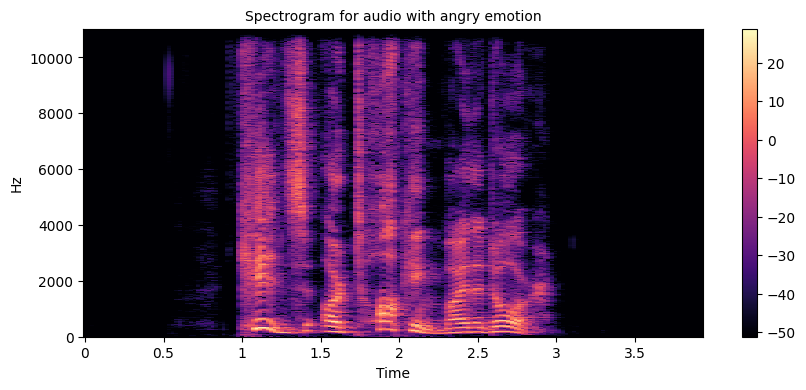

In [26]:
emotion='angry'
path = np.array(final_data.Path[final_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


### Sadness

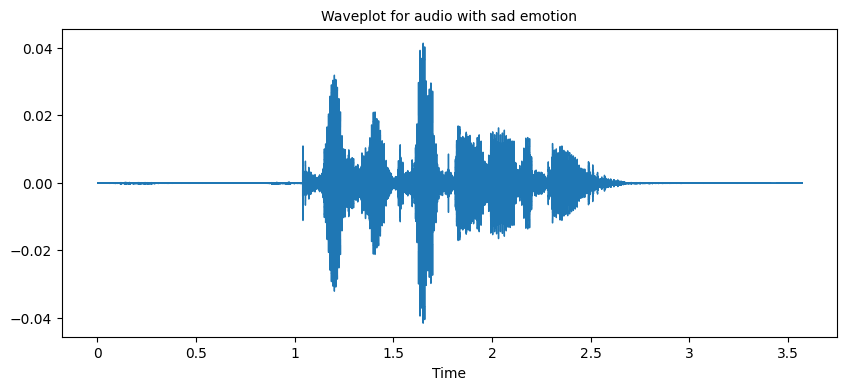

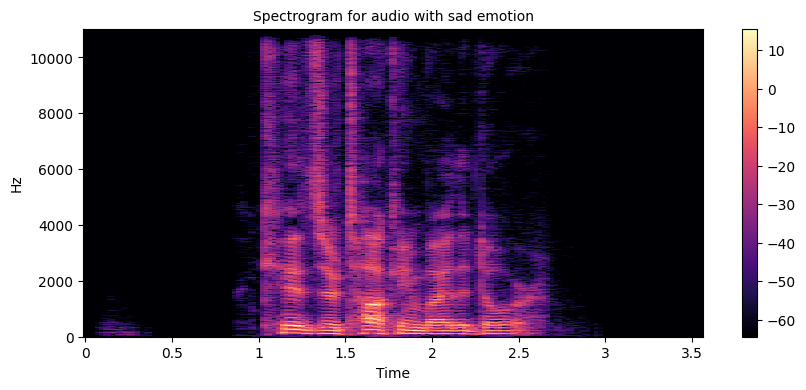

In [27]:
emotion='sad'
path = np.array(final_data.Path[final_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

### Happiness

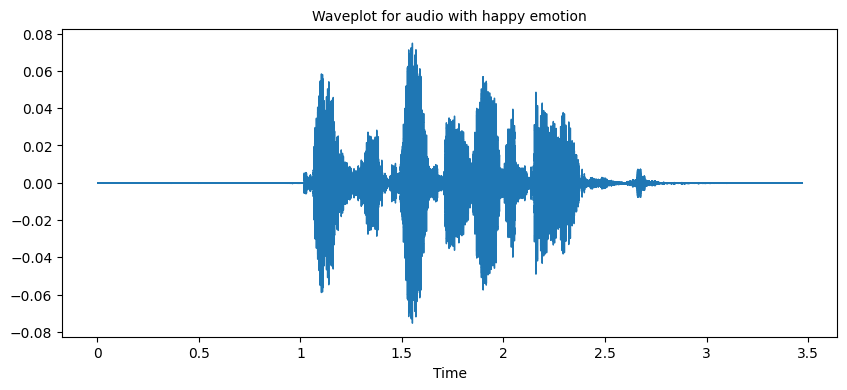

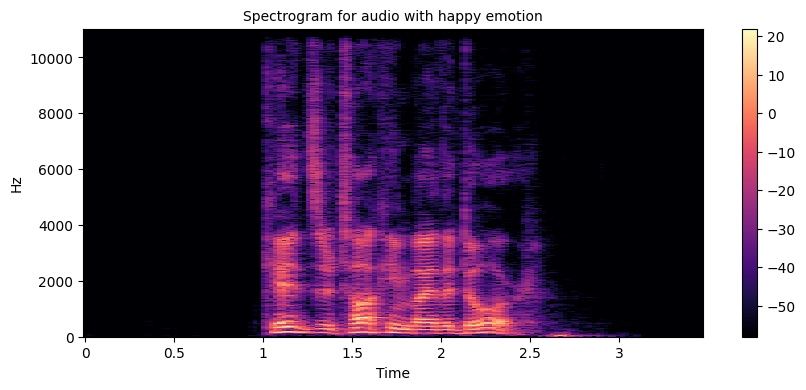

In [28]:
emotion='happy'
path = np.array(final_data.Path[final_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

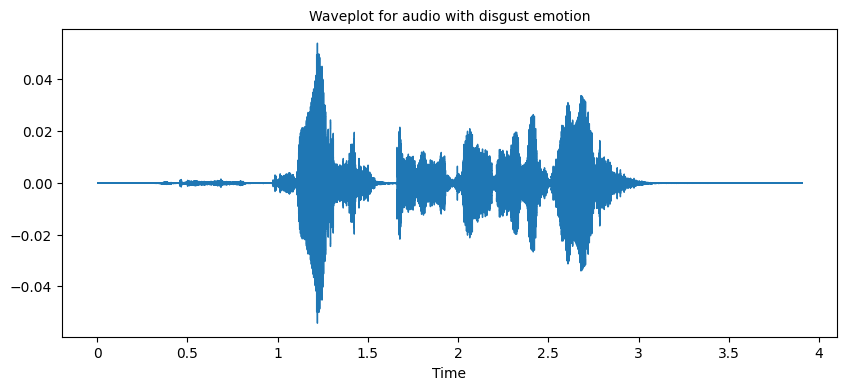

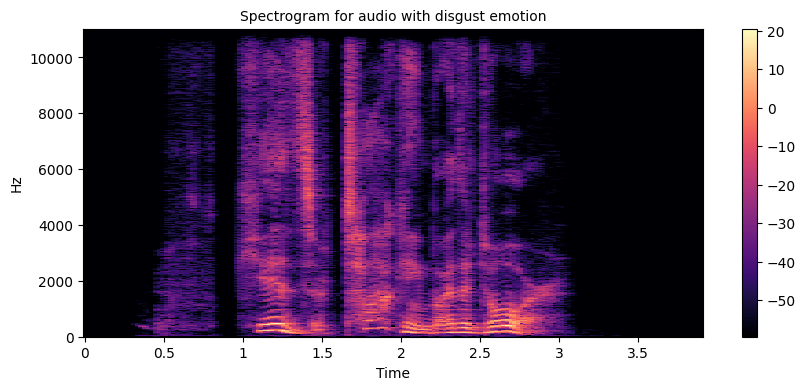

In [154]:
emotion='disgust'
path = np.array(final_data.Path[final_data.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

# Data Augmentation

In [29]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data


def stretch(data):
    return librosa.effects.time_stretch(data,rate=0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data):
    return librosa.effects.pitch_shift(data, sr=22050, n_steps=0.7)

# taking any example and checking for techniques.
path = np.array(final_data.Path)[1]
data, sampling_rate = librosa.load(path)

#### 1. Simple Audio

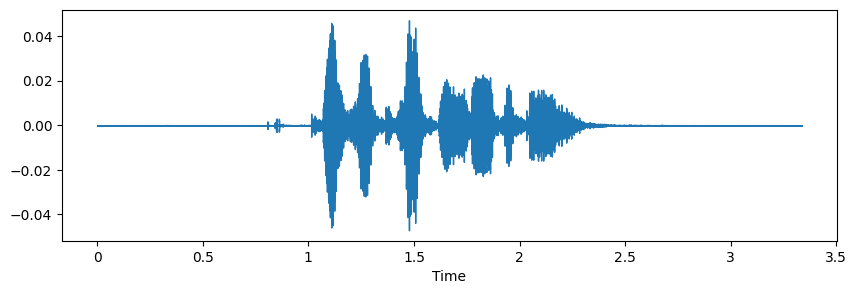

In [30]:
plt.figure(figsize=(10,3))
librosa.display.waveshow(y=data,sr=sampling_rate)
Audio(path)

#### 2. Noise injection

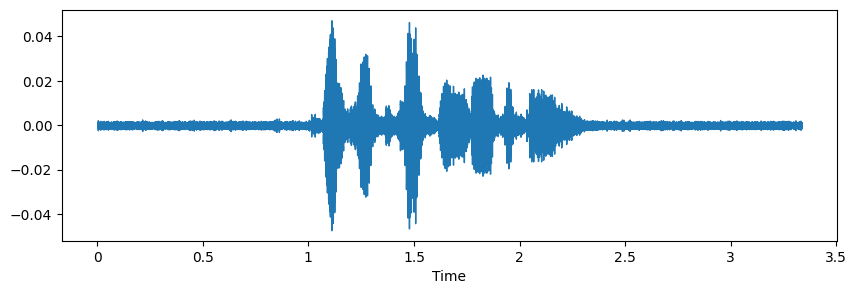

In [31]:
x=noise(data)
plt.figure(figsize=(10,3))
librosa.display.waveshow(x)
Audio(x, rate=sampling_rate)

#### 3. Stretching

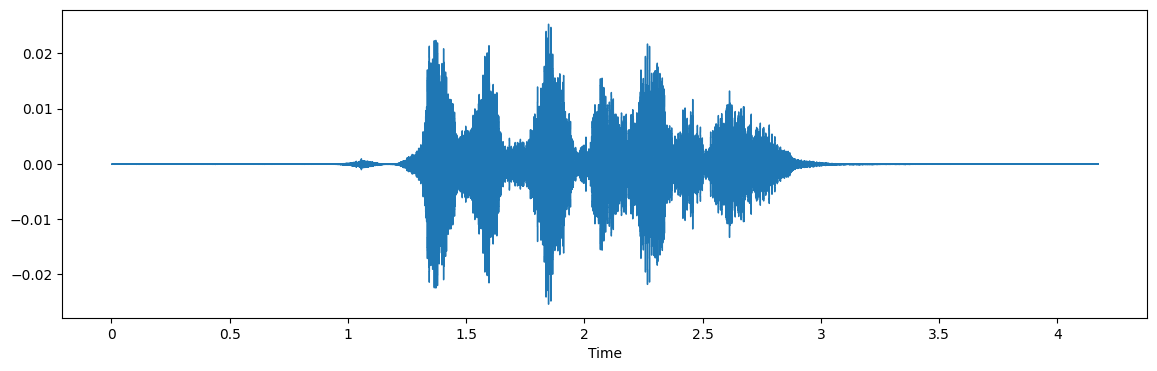

In [32]:
x=stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sampling_rate)
Audio(x, rate=sampling_rate)

#### 4. Shifting

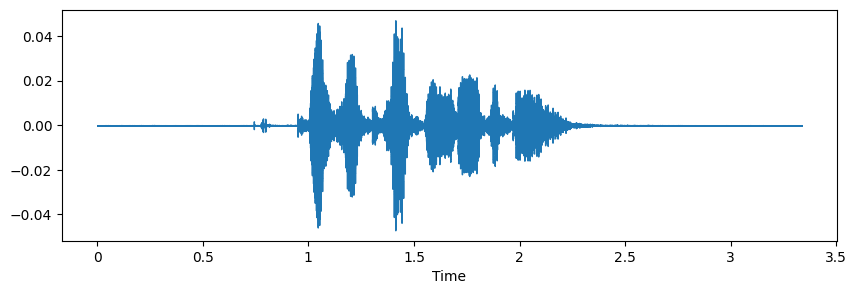

In [33]:
x=shift(data)
plt.figure(figsize=(10,3))
librosa.display.waveshow(y=x,sr=sampling_rate)
Audio(x,rate=sampling_rate)

#### 5. Pitch

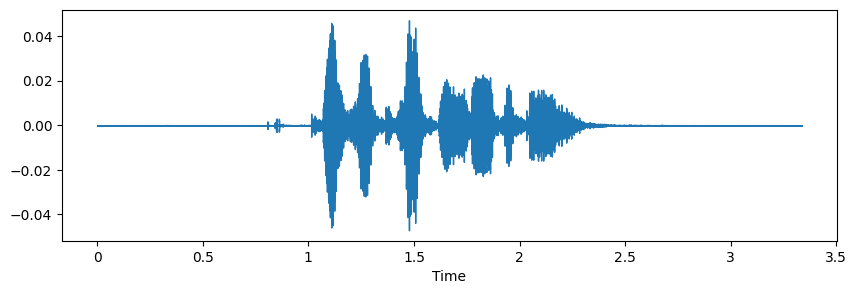

In [34]:
x=pitch(data)
plt.figure(figsize=(10,3))
librosa.display.waveshow(data)
Audio(x,rate=sampling_rate)

# Feature Extraction

In [35]:
def extract_features(data):
    #Zero Crossing Rate
    result=np.array([])
    zcr=np.mean(librosa.feature.zero_crossing_rate(data).T,axis=0)
    #stacking horizontally
    result=np.hstack((result,zcr))
    
    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T, axis=0)
    # stacking horizontally
    result = np.hstack((result, chroma_stft))

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate).T, axis=0)
    # stacking horizontally
    result = np.hstack((result, mfcc))

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    #stacking horizontally
    result = np.hstack((result, rms))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sampling_rate).T, axis=0)
    # stacking horizontally
    result = np.hstack((result, mel)) 
    
    return result


In [36]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [79]:
X, Y = [], []
for path, emotion in zip(final_data.Path, final_data.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

c:\Users\Roma\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [82]:
def check_empty_audio(X,Y):
    empty_audio_indices = []
    non_empty_audio_indices = []
    empty_threshold = 1e-6  # Adjust threshold to suit your feature scaling
    for i, features in enumerate(X):
        if np.all(np.abs(features) < empty_threshold):
            empty_audio_indices.append(i)
        else:
            non_empty_audio_indices.append(i)
        
    if empty_audio_indices:
        print(f"Found {len(empty_audio_indices)} features that might represent empty audio at indices: {empty_audio_indices}")
    else:
        print("No features likely representing empty audio found in the dataset.")

check_empty_audio(X,Y)

No features likely representing empty audio found in the dataset.


In [83]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto', random_state=42)

# Resample the dataset
X, Y = smote.fit_resample(X,Y)

In [84]:
len(X),len(Y)

(39312, 39312)

In [85]:
final_data.Path.shape

(11522,)

In [86]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.321275  0.729664  0.750033  0.730624  0.735275  0.713529  0.660531   
1  0.339392  0.817111  0.838502  0.835802  0.844315  0.820149  0.712952   
2  0.188256  0.622125  0.699215  0.753343  0.721212  0.701727  0.682356   
3  0.293566  0.673896  0.722096  0.723508  0.682302  0.680533  0.675352   
4  0.281146  0.737306  0.788577  0.760273  0.737278  0.751271  0.706078   

          7         8         9  ...           153           154  \
0  0.684966  0.733049  0.753972  ...  4.310903e-06  3.291511e-06   
1  0.703510  0.743463  0.793653  ...  1.269213e-04  1.312867e-04   
2  0.662828  0.686486  0.733960  ...  8.579052e-07  9.576654e-07   
3  0.628977  0.679179  0.707283  ...  6.984504e-06  7.034950e-06   
4  0.636021  0.692139  0.716528  ...  1.294635e-05  1.307120e-05   

            155           156           157           158       159       160  \
0  2.148075e-06  2.279739e-06  5.116492e-06  8.190282e-06  0.000007  0.000005   
1  1.262098e-04  1.206584e-04  1.274659e-04  1.341368e-04  0.000133  0.000129   
2  7.733596e-07  5.233101e-07  3.592860e-07  9.261693e-07  0.000002  0.000001   
3  6.654923e-06  6.979548e-06  1.214236e-05  9.640185e-06  0.000011  0.000006   
4  1.242479e-05  1.333753e-05  1.830950e-05  1.494682e-05  0.000017  0.000012   

            161   labels  
0  4.245835e-07  neutral  
1  1.207925e-04  neutral  
2  7.753986e-08  neutral  
3  4.254087e-07  neutral  
4  6.628899e-06  neutral  

[5 rows x 163 columns]

In [87]:
Features['labels'].value_counts()

labels
neutral     5616
happy       5616
sad         5616
angry       5616
fear        5616
disgust     5616
surprise    5616
Name: count, dtype: int64

In [132]:
X=Features.drop('labels',axis=1)
Y=Features.labels

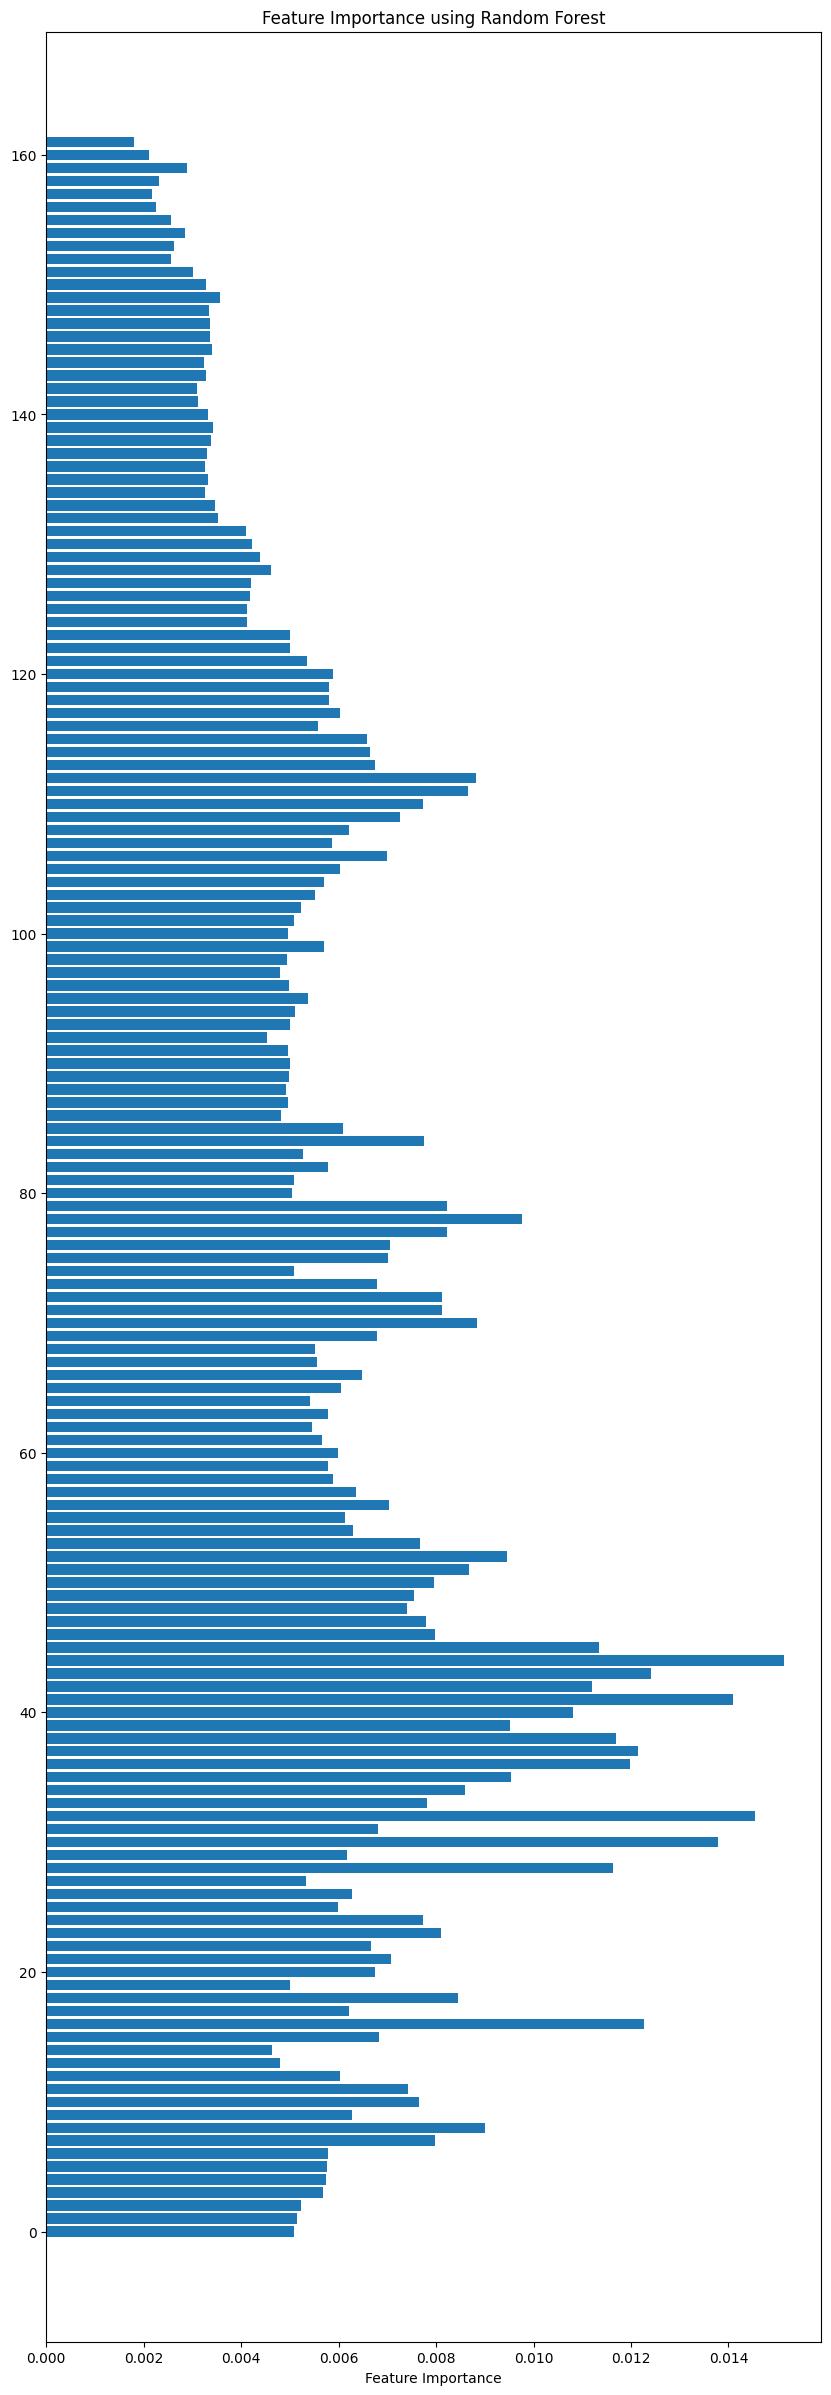

In [133]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Create a RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the model into X and Y 
rf_model.fit(X, Y)

# Getting feature importances extracted 
feature_importances = rf_model.feature_importances_

# Get column names
columns_names = X.columns

# Create a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({'Feature': columns_names, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(10, 30))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance using Random Forest')
plt.show()

In [134]:
top_features = feature_importance_df.tail(120)
top_features

Feature  Importance
86       86    0.004823
88       88    0.004927
98       98    0.004946
87       87    0.004962
100     100    0.004964
..      ...         ...
43       43    0.012412
30       30    0.013775
41       41    0.014094
32       32    0.014551
44       44    0.015146

[120 rows x 2 columns]

In [135]:
new_dataset=Features[top_features["Feature"]]
new_dataset['Labels']=Y

C:\Users\Roma\AppData\Local\Temp\ipykernel_7268\2520972647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['Labels']=Y


In [136]:
new_dataset.columns

Index([      86,       88,       98,       87,      100,       91,       89,
             96,       90,       93,
       ...
             38,       36,       37,       16,       43,       30,       41,
             32,       44, 'Labels'],
      dtype='object', length=121)

# Data Preparation

#### As we have now extracted the features, we will split our data into train set and test set.

In [137]:
X = new_dataset.iloc[: ,:-1].values
Y = new_dataset['Labels'].values

In [138]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [139]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, shuffle=True,stratify=Y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29484, 120), (29484, 7), (9828, 120), (9828, 7))

In [91]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29484, 162), (29484, 7), (9828, 162), (9828, 7))

In [140]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29484, 120, 1), (29484, 7), (9828, 120, 1), (9828, 7))

# Modelling

In [145]:
# Define the model
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    # Reshape layer to add channel dimension (for compatibility with Conv1D)
    #tf.keras.layers.Reshape((163, 1), input_shape=(163,)),
    
    # Convolutional layer with 64 filters, kernel size 3, and ReLU activation
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu',input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.15),
    
    # Max pooling layer
    tf.keras.layers.MaxPooling1D(pool_size=2),
    
    # Convolutional layer with 128 filters, kernel size 3, and ReLU activation
    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    tf.keras.layers.BatchNormalization(),

    # Max pooling layer
    tf.keras.layers.MaxPooling1D(pool_size=2),
    
    # Flatten layer
    tf.keras.layers.Flatten(),
    
    # Fully connected layer with 256 units and ReLU activation
    tf.keras.layers.Dense(256, activation='relu'),
    # Dropout layer to prevent overfitting
    tf.keras.layers.Dropout(0.25),
    
    # Output layer with 7 units (assuming 7 classes) and softmax activation
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Print the model summary
model.summary()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_58 (Conv1D)          (None, 118, 64)           256       
                                                                 
 dropout_23 (Dropout)        (None, 118, 64)           0         
                                                                 
 max_pooling1d_58 (MaxPooli  (None, 59, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_59 (Conv1D)          (None, 57, 128)           24704     
                                                                 
 batch_normalization_20 (Ba  (None, 57, 128)           512       
 tchNormalization)                                               
                                                                 
 max_pooling1d_59 (MaxPooli  (None, 28, 128)         

In [71]:
model=Sequential()
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(512, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_29 (Conv1D)          (None, 160, 128)          512       
                                                                 
 batch_normalization_4 (Bat  (None, 160, 128)          512       
 chNormalization)                                                
                                                                 
 max_pooling1d_29 (MaxPooli  (None, 80, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_30 (Conv1D)          (None, 78, 256)           98560     
                                                                 
 batch_normalization_5 (Bat  (None, 78, 256)           1024      
 chNormalization)                                                
                                                      

In [146]:
#rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50


461/461 [==============================] - 19s 38ms/step - loss: 1.5071 - accuracy: 0.4401 - val_loss: 1.2390 - val_accuracy: 0.5101
Epoch 2/50
461/461 [==============================] - 17s 36ms/step - loss: 1.2372 - accuracy: 0.5078 - val_loss: 1.1440 - val_accuracy: 0.5460
Epoch 3/50
461/461 [==============================] - 17s 36ms/step - loss: 1.1692 - accuracy: 0.5311 - val_loss: 1.1132 - val_accuracy: 0.5534
Epoch 4/50
461/461 [==============================] - 16s 36ms/step - loss: 1.1354 - accuracy: 0.5458 - val_loss: 1.0799 - val_accuracy: 0.5639
Epoch 5/50
461/461 [==============================] - 17s 36ms/step - loss: 1.1038 - accuracy: 0.5613 - val_loss: 1.0855 - val_accuracy: 0.5577
Epoch 6/50
461/461 [==============================] - 17s 37ms/step - loss: 1.0718 - accuracy: 0.5720 - val_loss: 1.0382 - val_accuracy: 0.5909
Epoch 7/50
461/461 [==============================] - 16s 36ms/step - loss: 1.0440 - accuracy: 0.5830 - val_loss: 1.0161 - val_accuracy: 0.6008
Epo

In [147]:
#history=model.fit(x_train, y_train, batch_size=64, epochs=100, initial_epoch=50, validation_data=(x_test, y_test))

In [148]:
print("Accuracy of our model on test data:",model.evaluate(x_test,y_test)[1]*100,"%")

308/308 [==============================] - 2s 6ms/step - loss: 0.9623 - accuracy: 0.6580
Accuracy of our model on test data: 65.80179333686829 %


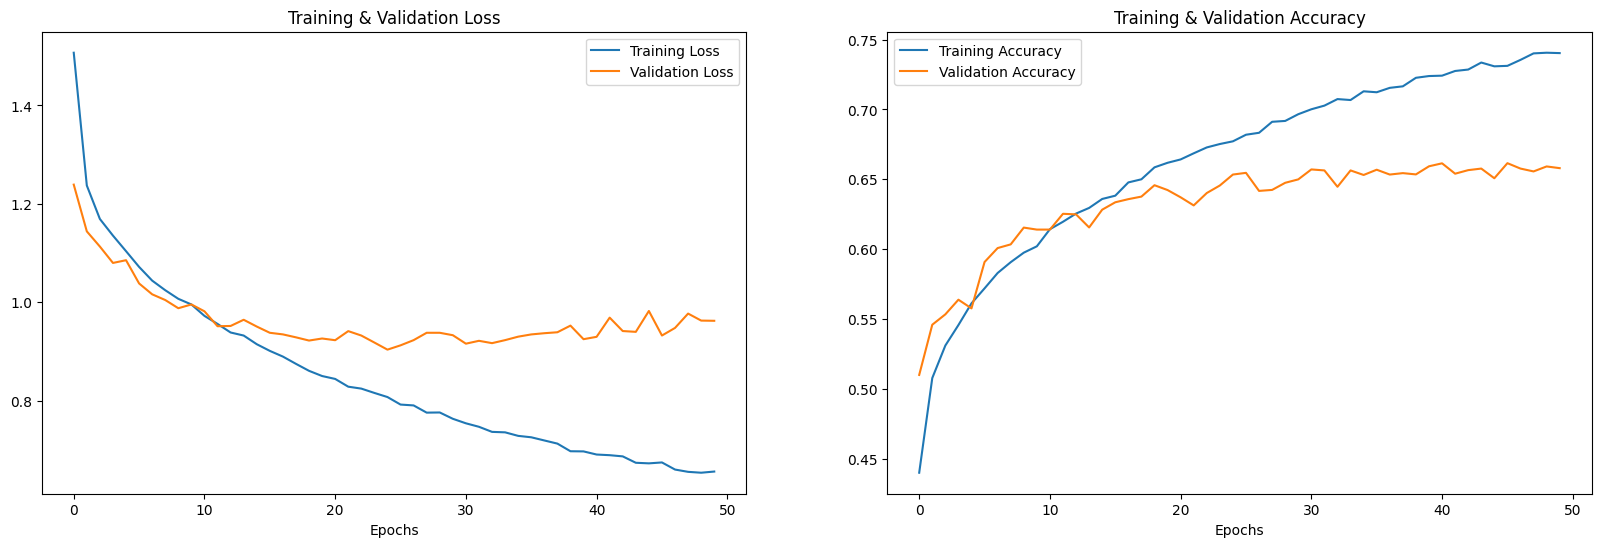

In [149]:
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [150]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

308/308 [==============================] - 2s 6ms/step


In [151]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(15)

Predicted Labels Actual Labels
0           neutral          fear
1          surprise      surprise
2             angry       disgust
3           neutral       neutral
4          surprise      surprise
5             happy       disgust
6             angry         angry
7             happy         happy
8             happy         happy
9          surprise      surprise
10          disgust       disgust
11            happy       neutral
12          disgust         happy
13              sad           sad
14            happy         happy

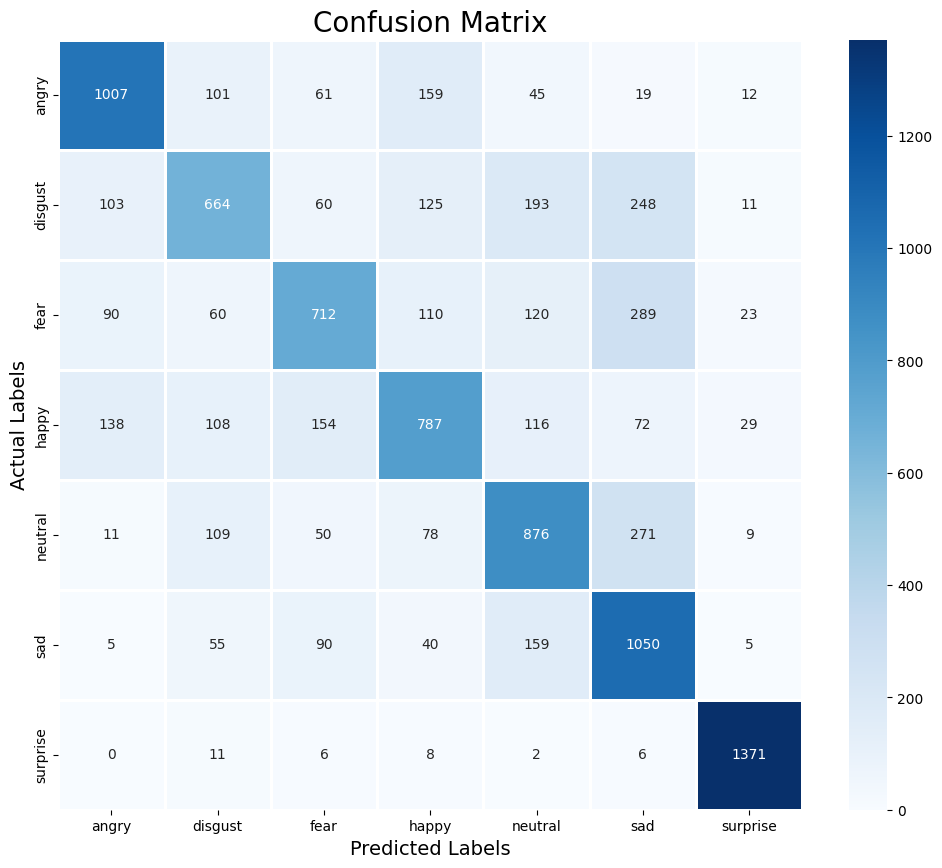

In [152]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.74      0.72      0.73      1404
     disgust       0.60      0.47      0.53      1404
        fear       0.63      0.51      0.56      1404
       happy       0.60      0.56      0.58      1404
     neutral       0.58      0.62      0.60      1404
         sad       0.54      0.75      0.63      1404
    surprise       0.94      0.98      0.96      1404

    accuracy                           0.66      9828
   macro avg       0.66      0.66      0.65      9828
weighted avg       0.66      0.66      0.65      9828



# Modelling - LSTM

In [168]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values


In [169]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29484, 162, 1), (29484, 7), (9828, 162, 1), (9828, 7))

In [178]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
model = Sequential()

# LSTM layers
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.3))

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))

# Merge layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))

# Output layer
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [125]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(units=128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    Dense(units=7, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [78]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
model=Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=256, return_sequences=True))  # LSTM layer for capturing long-term dependencies
model.add(Dropout(0.2))
model.add(LSTM(units=128))  # Another LSTM layer for deeper feature extraction
model.add(Dropout(0.2))  # Dropout for regularization (adjust rate as needed)
model.add(Dense(units=8, activation='softmax'))
model.compile(loss='ssparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Early stopping to prevent overfitting (adjust patience as needed)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


In [180]:
history=model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
461/461 [==============================] - 227s 493ms/step - loss: 1.5046 - accuracy: 0.4061 - val_loss: 1.4186 - val_accuracy: 0.4721
Epoch 2/20
461/461 [==============================] - 214s 464ms/step - loss: 1.3510 - accuracy: 0.4706 - val_loss: 1.2508 - val_accuracy: 0.5080
Epoch 3/20
461/461 [==============================] - 224s 486ms/step - loss: 1.2751 - accuracy: 0.4975 - val_loss: 1.1658 - val_accuracy: 0.5403
Epoch 4/20
461/461 [==============================] - 212s 461ms/step - loss: 1.2101 - accuracy: 0.5213 - val_loss: 1.1282 - val_accuracy: 0.5560
Epoch 5/20
461/461 [==============================] - 207s 448ms/step - loss: 1.1701 - accuracy: 0.5352 - val_loss: 1.1124 - val_accuracy: 0.5661
Epoch 6/20
461/461 [==============================] - 210s 455ms/step - loss: 1.1419 - accuracy: 0.5446 - val_loss: 1.0759 - val_accuracy: 0.5726
Epoch 7/20
461/461 [==============================] - 210s 456ms/step - loss: 1.1156 - accuracy: 0.5593 - val_loss: 1.0335 -

KeyboardInterrupt: 

In [161]:
history=model.fit(x_train, y_train, batch_size=64, epochs=50, initial_epoch=20, validation_data=(x_test, y_test))

Epoch 21/50
461/461 [==============================] - 111s 241ms/step - loss: 0.8299 - accuracy: 0.6676 - val_loss: 0.8940 - val_accuracy: 0.6519
Epoch 22/50
461/461 [==============================] - 108s 235ms/step - loss: 0.8194 - accuracy: 0.6712 - val_loss: 0.8674 - val_accuracy: 0.6616
Epoch 23/50
461/461 [==============================] - 105s 228ms/step - loss: 0.8110 - accuracy: 0.6780 - val_loss: 0.8603 - val_accuracy: 0.6647
Epoch 24/50
461/461 [==============================] - 103s 225ms/step - loss: 0.8058 - accuracy: 0.6754 - val_loss: 0.8750 - val_accuracy: 0.6594
Epoch 25/50
461/461 [==============================] - 104s 225ms/step - loss: 0.7879 - accuracy: 0.6826 - val_loss: 0.8608 - val_accuracy: 0.6684
Epoch 26/50
461/461 [==============================] - 105s 228ms/step - loss: 0.7815 - accuracy: 0.6885 - val_loss: 0.8538 - val_accuracy: 0.6670
Epoch 27/50
461/461 [==============================] - 108s 235ms/step - loss: 0.7685 - accuracy: 0.6932 - val_loss: 0

In [162]:
print("Accuracy of our model on test data:",model.evaluate(x_test,y_test)[1]*100,"%")

308/308 [==============================] - 18s 57ms/step - loss: 0.8844 - accuracy: 0.6913
Accuracy of our model on test data: 69.12901997566223 %


In [164]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(15)

308/308 [==============================] - 19s 59ms/step


Predicted Labels Actual Labels
0              fear         angry
1           disgust         happy
2          surprise      surprise
3             happy         happy
4           disgust       disgust
5              fear           sad
6           disgust       disgust
7             happy         happy
8           neutral       neutral
9             happy         happy
10              sad           sad
11              sad       disgust
12            happy         happy
13          disgust       disgust
14          disgust           sad

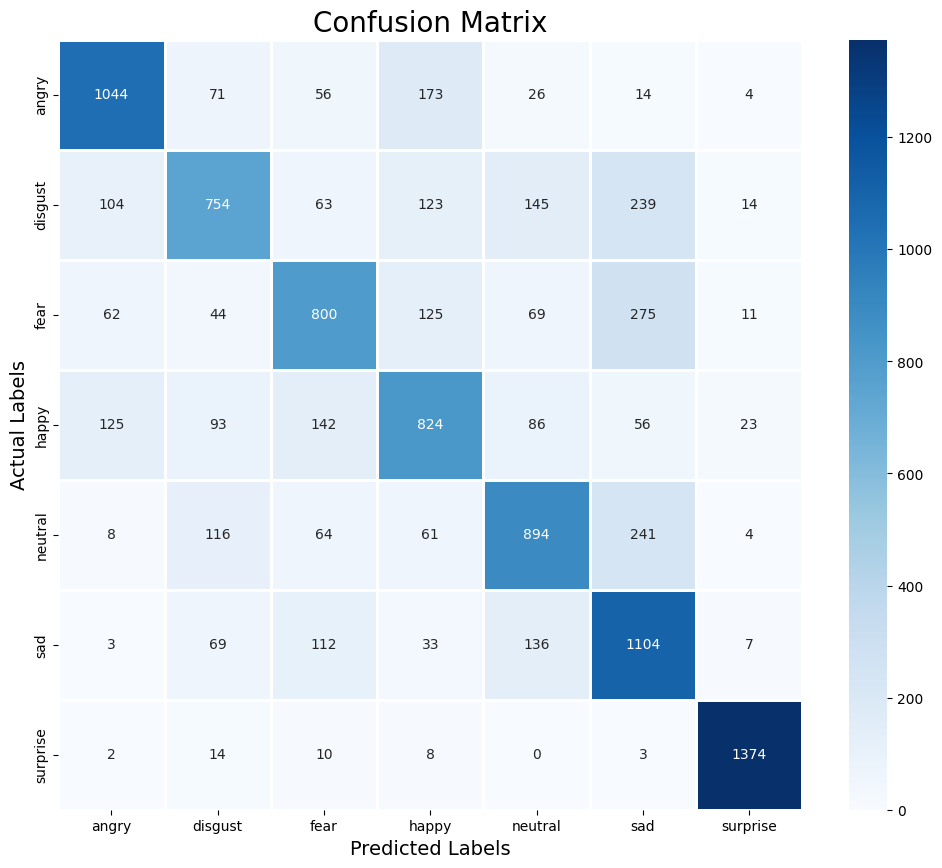

In [165]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.68      0.72      0.70      1438
        calm       0.65      0.61      0.63       137
     disgust       0.54      0.49      0.51      1468
        fear       0.59      0.50      0.54      1424
       happy       0.54      0.53      0.54      1462
     neutral       0.55      0.60      0.57      1310
         sad       0.57      0.64      0.60      1400
    surprise       0.77      0.81      0.79       483

    accuracy                           0.59      9122
   macro avg       0.61      0.61      0.61      9122
weighted avg       0.59      0.59      0.59      9122

